In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('loan_approved.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [5]:
data['Gender'].mode()[0]

'Male'

In [6]:
data.loc[data['Gender'].isnull() ==True,'Gender'] = data['Gender'].mode()[0]

In [8]:
data['Gender'].isnull().sum()

0

In [9]:
data.loc[data['Married'].isnull() ==True,'Married'] = data['Married'].mode()[0]
data.loc[data['Dependents'].isnull() ==True,'Dependents'] = data['Dependents'].mode()[0]
data.loc[data['Self_Employed'].isnull() ==True,'Self_Employed'] = data['Self_Employed'].mode()[0]

In [10]:
data.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [11]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [12]:
### credit history is a descrete column
# due to which we fill the null values with mode
data.loc[data['Credit_History'].isnull() ==True,'Credit_History'] = data['Credit_History'].mode()[0]

In [13]:
data['Loan_Amount_Term'].unique() # is a descrete data, fill the null with mode

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [14]:
data.loc[data['Loan_Amount_Term'].isnull() ==True,'Loan_Amount_Term'] = data['Loan_Amount_Term'].mode()[0]

In [15]:
# LoanAmount is  a conti data
# upom checking the distribution----> mean or median

<Axes: ylabel='Density'>

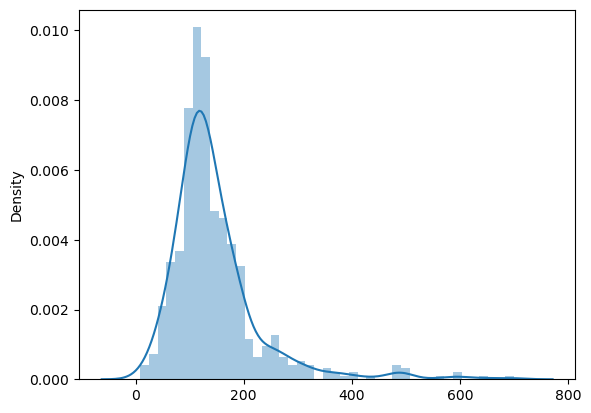

In [16]:
sns.distplot(x=data['LoanAmount'])

In [17]:
data.loc[data['LoanAmount'].isnull() ==True,'LoanAmount'] = data['LoanAmount'].median()

In [18]:
data.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [20]:
data.duplicated().sum()

0